In [1]:
using XLSX

In [5]:
using DataFrames

In [3]:
using StatsPlots

In [6]:
fn = "./fir_comparison.xlsx"

"./fir_comparison.xlsx"

In [7]:
xf = XLSX.readxlsx(fn)

XLSXFile("fir_comparison.xlsx") containing 2 Worksheets
            sheetname size          range        
-------------------------------------------------
              Results 25x18         A1:R25       
          Experiments 2x5           A1:E2        


In [8]:
dfs = Dict([n=>DataFrame(XLSX.readtable(fn, n)...) for n in XLSX.sheetnames(xf)])

Dict{String,DataFrame} with 2 entries:
  "Experiments" => 1×5 DataFrame. Omitted printing of 1 columns…
  "Results"     => 24×18 DataFrame. Omitted printing of 16 columns…

In [9]:
res = dfs["Results"]

,Design,Description,Bram18k,DSP48E
,Any,Any,Any,Any
1,basic,Stock Code,0,1
2,fission,split loop into 2,0,2
3,remove_if,remove conditional logic from loop,0,2
4,unroll_2,Unroll loops by factor of 2,0,11
5,unroll_all,Completely unroll loops,0,11
6,unroll_all_2pbram,unroll all and use a 2p bram for shift reg.,0,11
7,basic_1pbram,Basic code but with a 1p bram,0,3
8,unroll_all_1pbram,"all unrolled, 1pbram",0,11
9,32b_unroll_all,"all unrolled, full precision",0,33


In [10]:
res = res[1:12, :];

In [11]:
plotlyjs()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-4522156033374641797\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-10105547249244088998\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-4522156033374641797\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.PlotlyJSBackend()

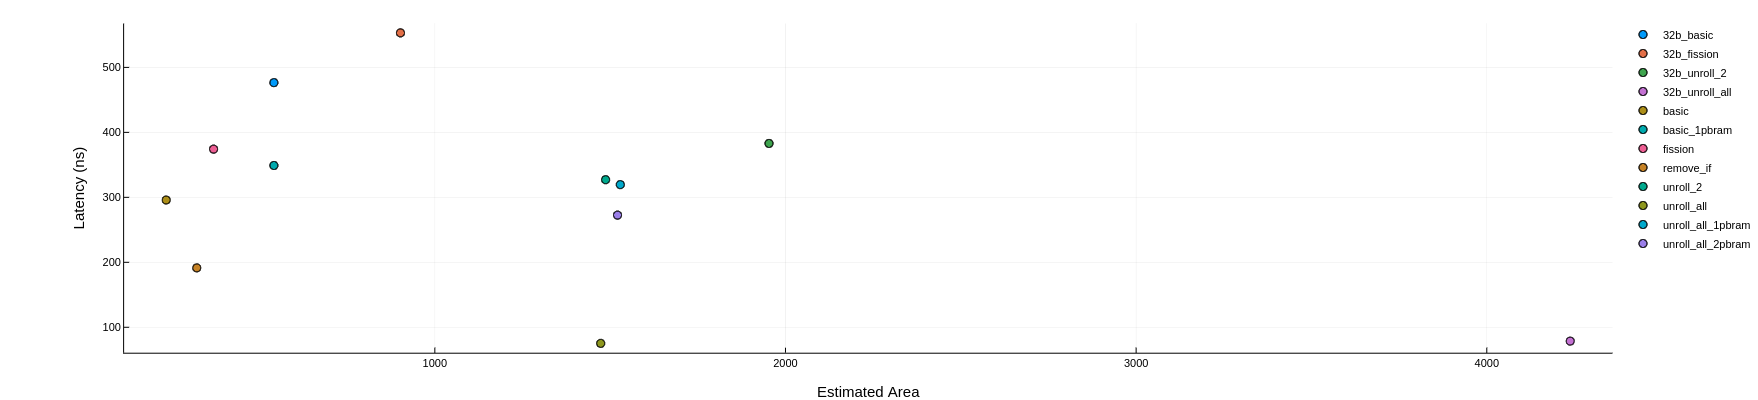

In [25]:
p1 = @df res scatter(:Area_Estimate, :MAX_LATENCY_NS, 
    group=:Design,
    xlabel="Estimated Area",
    ylabel="Latency (ns)"
    )

In [18]:
function get_pareto(xs, ys)
    besty = maximum(ys)
    bxs, bys = [], []
    for i in 1:length(xs)
        if ys[i] < besty
            # println("$(ys[i]) < $(besty)")
            besty = ys[i]
        end
        push!(bxs, xs[i])
        push!(bys, besty)
    end
    return bxs, bys
end

get_pareto (generic function with 1 method)

In [19]:
cols = sort(res, :Area_Estimate, rev=false)[:, [:Area_Estimate, :MAX_LATENCY_NS]];
xs, ys = get_pareto(cols[:,1], cols[:,2]);

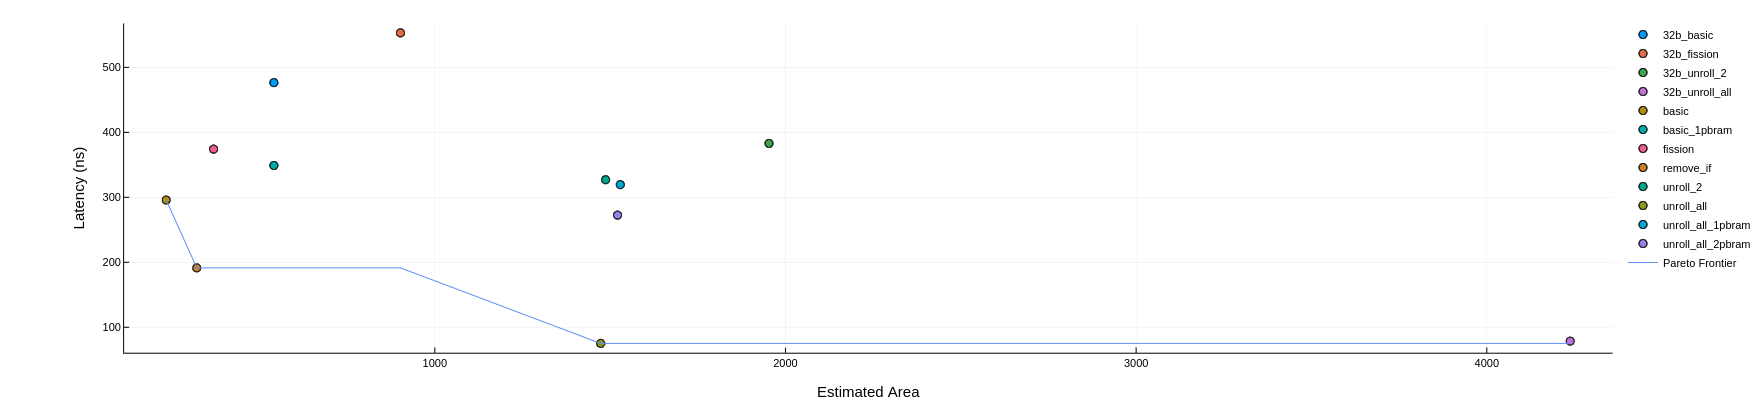

In [26]:
p2 = plot(p1)
plot!(xs, ys, label="Pareto Frontier")

In [35]:
savefig(p2, "report/imgs/pareto.pdf")

In [73]:
pgfplots()

Plots.PGFPlotsBackend()

In [27]:
using RDatasets

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1252


In [28]:
ds = dataset("datasets", "iris")

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


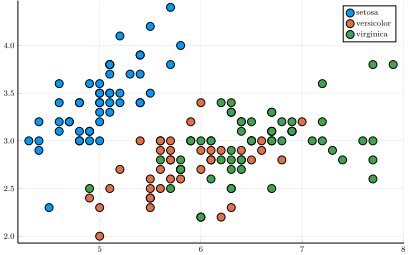

In [32]:
@df ds scatter(:SepalLength, :SepalWidth, group=:Species, marker=[8])

In [34]:
x = range(0, 10, step=0.1)

0.0:0.1:10.0

In [48]:
using LatexStrings

ArgumentError: ArgumentError: Package LatexStrings not found in current path:
- Run `import Pkg; Pkg.add("LatexStrings")` to install the LatexStrings package.


In [55]:
using Pkg
Pkg.add("LaTeXStrings")

 Resolving package versions...
  Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [56]:
using LaTeXStrings

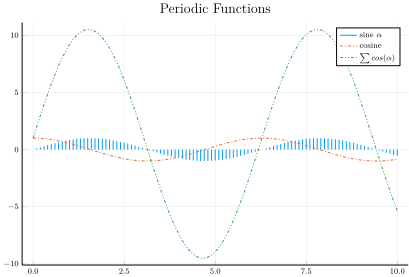

In [62]:
plot(x, sin.(x), line=:stem, label=L"sine $\alpha$", title="Periodic Functions")
plot!(x, cos.(x), style=:dashdot, label="cosine")
plot!(x, cumsum(cos.(x)), style=:dashdotdot, label=L"$\sum cos(\alpha)$")

In [46]:
savefig("test_fig.png")

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1252
